<a href="https://colab.research.google.com/github/RaThapa/DataScience/blob/main/Homework_2A_Rasila_Thapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2A


#Business Understanding:
Golf Game Overview:
Golf is a precision sport where players use various clubs to hit a ball into a series of holes on a course with the fewest possible strokes. It is played outdoors on a course with natural and man-made obstacles. Factors such as weather conditions, including temperature, humidity, and wind, can influence the playing experience. These factors influencing the decision to play golf, holds corporate relevance for businesses in the golf industry. Golf facilities, event organizers, and related services can leverage to enhance operational efficiency, customer satisfaction, and overall business performance. Understanding how weather conditions impact golf participation allows for strategic decision-making, and tailored customer experiences.



#Data Understanding:

Data Characteristics:
The dataset contains 14 instances, each representing a day.
It covers diverse weather scenarios, including sunny, overcast, and rainy conditions.
Temperature, humidity, and wind conditions vary across instances

Features:

Play: Indicates whether golf was played on a given day (target variable).

Outlook: Describes weather conditions (sunny, overcast, rain).

Temperature: Represents the temperature on the day.

Humidity: Indicates the humidity level.

Wind: Denotes the presence of wind (True or False).

Objective:
The primary objective is to build a predictive model that accurately determines whether golf will be played based on weather conditions. This model can assist golf facility operators, event planners, or enthusiasts in making informed decisions about when to expect increased golf activity. By understanding the relationships between weather factors and the decision to play golf.

# Data Preparation:
It is a crucial step in data analysis, it invloves:
organizing the dataset,
finding the center point of each attribute,
understanding the spread,
visualization each attributes via various methods, understanding the realtion between the attributes
and so on
we prepare out data inorder to comeup with optimal performining model.

In [ ]:
#making necessary imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree


In [ ]:
# Loading  the data
data = {
    'Play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain'],
    'Temperature': [85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71],
    'Humidity': [85, 90, 78, 96, 80, 70, 65, 95, 70, 80, 70, 90, 75, 80],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True]
}

df = pd.DataFrame(data)
# or df = pd.read_csv('/content/sample_data/golf.csv')

In [ ]:
df.head(14)

,Play,Outlook,Temperature,Humidity,Wind
0,no,sunny,85,85,False
1,no,sunny,80,90,True
2,yes,overcast,83,78,False
3,yes,rain,70,96,False
4,yes,rain,68,80,False
5,no,rain,65,70,True
6,yes,overcast,64,65,True
7,no,sunny,72,95,False
8,yes,sunny,69,70,False
9,yes,rain,75,80,False


In [ ]:
#Descriptive Statistics for Numerical Columns
all_stats = df.iloc[:, 1:].describe(include='all')

# Print the results
print("Descriptive Statistics for All Columns:\n", all_stats)


Descriptive Statistics for All Columns:
        Outlook  Temperature   Humidity   Wind
count       14    14.000000  14.000000     14
unique       3          NaN        NaN      2
top      sunny          NaN        NaN  False
freq         5          NaN        NaN      8
mean       NaN    73.571429  80.285714    NaN
std        NaN     6.571667   9.840486    NaN
min        NaN    64.000000  65.000000    NaN
25%        NaN    69.250000  71.250000    NaN
50%        NaN    72.000000  80.000000    NaN
75%        NaN    78.750000  88.750000    NaN
max        NaN    85.000000  96.000000    NaN


In [ ]:
# Display mode, range, and variance for 'Temperature' and 'Humidity' columns
temperature_mode = df['Temperature'].mode().iloc[0]
temperature_range = df['Temperature'].max() - df['Temperature'].min()
temperature_variance = df['Temperature'].var()

humidity_mode = df['Humidity'].mode().iloc[0]
humidity_range = df['Humidity'].max() - df['Humidity'].min()
humidity_variance = df['Humidity'].var()

print(f"\nMode Temperature: {temperature_mode}")
print(f"Range of Temperature: {temperature_range}")
print(f"Variance of Temperature: {temperature_variance}")

print(f"\nMode Humidity: {humidity_mode}")
print(f"Range of Humidity: {humidity_range}")
print(f"Variance of Humidity: {humidity_variance}")
# A higher variance indicates greater variability in humidity values from the mean.


Mode Temperature: 72
Range of Temperature: 21
Variance of Temperature: 43.18681318681318

Mode Humidity: 70
Range of Humidity: 31
Variance of Humidity: 96.83516483516483


Temperature:
The temperatures range from 64 to 85 degrees, with a mean of approximately 73.57 degrees.
The distribution appears relatively tight, with a standard deviation of approximately 6.57.
Humidity:
The humidity values range from 65% to 96%, with a mean of approximately 80.29%.
The distribution is spread out, as indicated by a larger standard deviation of approximately 9.84.
Mode Comparison:
The mode for temperature is 72 degrees, indicating a frequently occurring temperature.
The mode for humidity is 70%, suggesting a frequently occurring humidity level.
Variance Comparison:
The variance for temperature (43.19) is moderate, indicating a moderate spread of temperatures around the mean.
The variance for humidity (96.84) is relatively high, suggesting a larger spread of humidity values around the mean.


In [ ]:
# Find the skewness for 'Temperature' and 'Humidity'
temperature_skewness = df['Temperature'].skew()
humidity_skewness = df['Humidity'].skew()

print(f"Skewness of Temperature: {temperature_skewness}")
print(f"Skewness of Humidity: {humidity_skewness}")

Skewness of Temperature: 0.3689986448696655
Skewness of Humidity: 0.1891728139609198


If the skewness is close to 0, the distribution is approximately symmetric. A positive skewness indicates a right-skewed distribution (long tail on the right), while a negative skewness indicates a left-skewed distribution (long tail on the left).

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.iloc[:, 1:].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             Temperature  Humidity      Wind
Temperature     1.000000  0.273245 -0.328866
Humidity        0.273245  1.000000 -0.254415
Wind           -0.328866 -0.254415  1.000000


<ipython-input-30-19bcf3cc1737>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.iloc[:, 1:].corr()


The positive correlation between temperature and humidity suggests that, on average, higher temperatures are associated with higher humidity.
The negative correlation between temperature and wind suggests that, on average, higher temperatures are associated with lower wind speeds.
The negative correlation between humidity and wind suggests that, on average, higher humidity is associated with lower wind speeds.

In [ ]:
# Display descriptive statistics for categorical columns
categorical_stats = df.iloc[:, 1:].describe(include='object')
print("\nDescriptive Statistics for Categorical Columns:\n", categorical_stats)


Descriptive Statistics for Categorical Columns:
        Outlook
count       14
unique       3
top      sunny
freq         5


#Play
Out of the 14 observations, 9 have a 'Play' value of 'yes', indicating that golf was played in those instances. The remaining 5 observations have a 'Play' value of 'no', suggesting that golf was not played.

#Outlook
The 'Outlook' column represents different weather conditions. 'Sunny' is the most frequently occurring weather condition, appearing 5 times out of the 14 observations.

In [ ]:
#Visualization

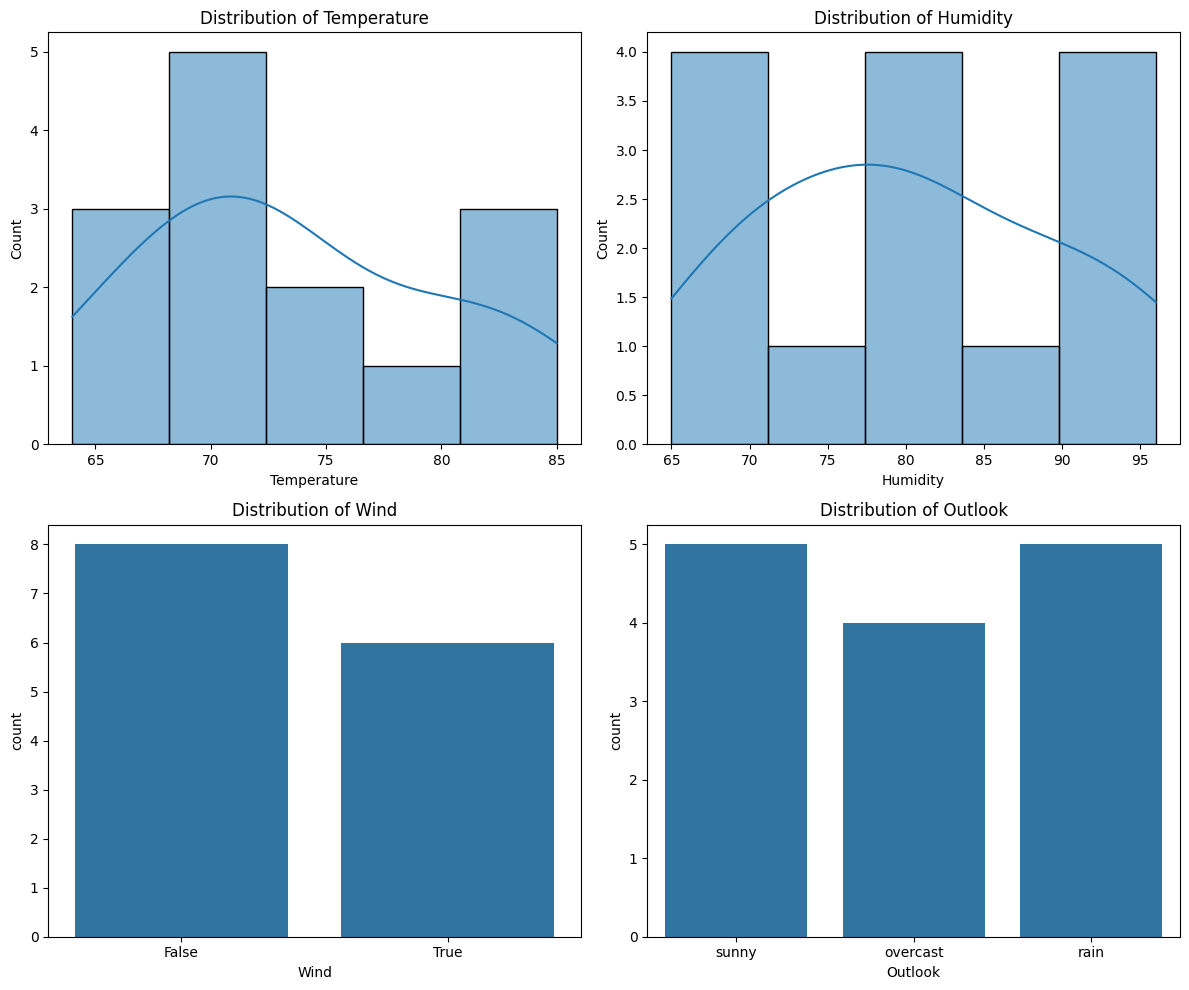

In [ ]:
# Set up a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Distribution plot for 'Temperature'
sns.histplot(data=df, x='Temperature', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Temperature')

# Distribution plot for 'Humidity'
sns.histplot(data=df, x='Humidity', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Humidity')

# Count plot for 'Wind'
sns.countplot(data=df, x='Wind', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Wind')

# Count plot for 'Outlook'
sns.countplot(data=df, x='Outlook', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Outlook')

plt.tight_layout()
plt.show()

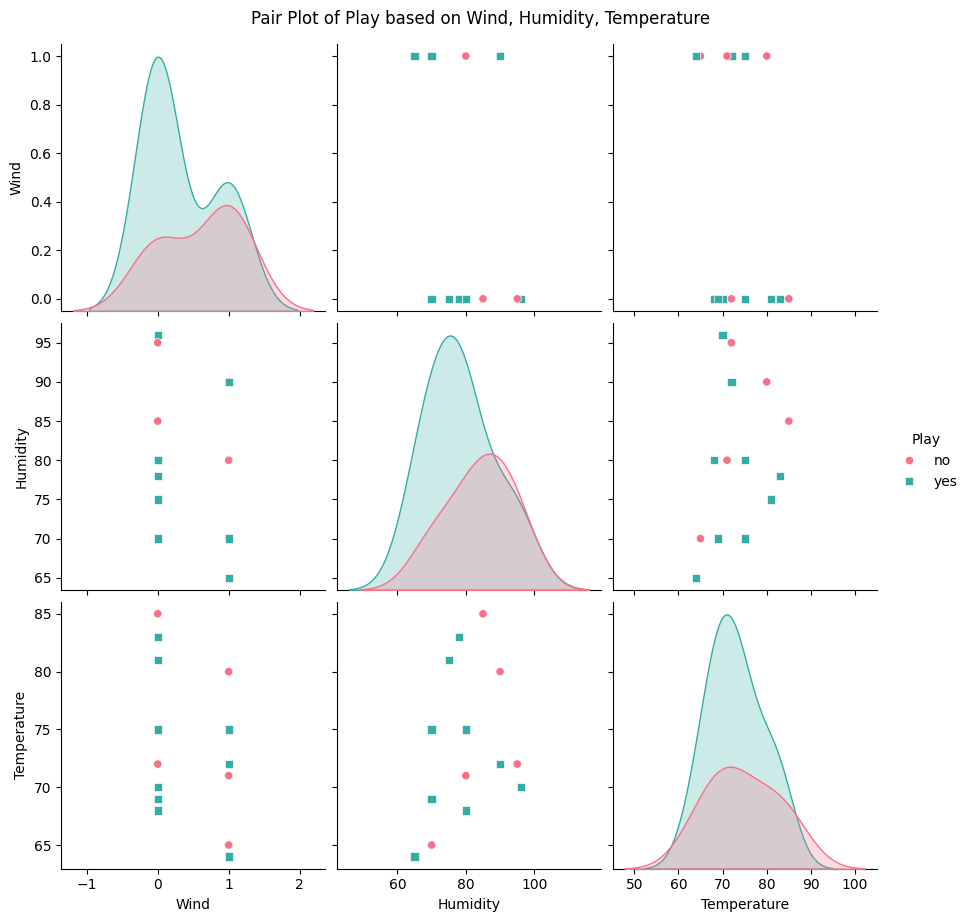

In [ ]:
# Create a pair plot with 'Play' as hue
sns.pairplot(df, hue='Play', markers=["o", "s"], palette="husl", vars=['Wind', 'Humidity', 'Temperature'], height=3)
plt.suptitle('Pair Plot of Play based on Wind, Humidity, Temperature', y=1.02)
plt.show()
#pair plot where each scatter plot shows the relationship between two numerical features ('Wind', 'Humidity', 'Temperature').
#The points are colored based on the 'Play' variable

In [ ]:
def rule_based_classifier(outlook, wind, temperature_category, humidity_category):
    if outlook == 'overcast':
        return 'yes'
    elif outlook == 'sunny' and not wind:
        return 'no'
    elif outlook == 'rain' and (temperature_category == 'Cool' or temperature_category == 'Mild'):
        return 'yes'
    elif outlook == 'rain' and wind:
        return 'no'
    elif outlook == 'sunny' and temperature_category == 'Mild':
        return 'yes'
    else:
        return 'unknown'  # Default if none of the rules match

# Sample Data
data = {
    'Outlook': ['overcast', 'sunny', 'rain', 'rain', 'sunny'],
    'Wind': [False, False, True, True, False],
    'Temperature_Category': ['Mild', 'Mild', 'Cool', 'Mild', 'Mild'],
    'Humidity_Category': ['High', 'Normal', 'High', 'Normal', 'High']
}

# Apply the rule-based classifier to the sample data
for idx, instance in enumerate(zip(data['Outlook'], data['Wind'], data['Temperature_Category'], data['Humidity_Category'])):
    prediction = rule_based_classifier(*instance)
    print(f"Instance {idx+1}: Predicted Class - {prediction}")

If Temperature is <= 68, then Play = "no."
If Temperature is > 68 and <= 75, then Play = "yes."
If Temperature is > 75, then Play = "no."

Humidity Rules:
If Humidity is > 80, then Play = "no."
If Humidity is <= 80, then Play = "yes."

#Manual Rule induction:


Creating  rules for predicting the 'Play' outcome based on the categorical variables 'Outlook', 'Wind', 'Temperature_Category', and 'Humidity_Category'. manual rule induction often relies on the specific characteristics of your dataset and domain knowledge.







1. Rule 1:
If Outlook is 'overcast', then Play is 'yes'.
(Pattern: Instances with 'overcast' weather condition consistently result in a positive outcome for playing golf. Therefore, this rule captures the straightforward relationship between 'overcast' and 'yes' for playing.)

2. Rule 2:
If Outlook is 'sunny' and Wind is False, then Play
is 'no'.
Pattern: When the weather is 'sunny' and there is no wind (Wind is False), the instances tend to lead to a negative outcome for playing golf. This rule captures the negative impact of windy conditions when the weather is sunny.)

3. Rule 3:
If Outlook is 'rain' and (Temperature is 'Cool' or Temperature is 'Mild'), then Play is 'yes'. (Pattern: Rainy weather conditions coupled with moderate temperatures ('Cool' or 'Mild') consistently result in a positive outcome for playing golf. This rule reflects the preference for playing golf during rain when temperatures are moderate.)

4. Rule 4:
If Outlook is 'rain' and Wind is True, then Play is 'no'. (Pattern: Rainy weather with windy conditions (Wind is True) tends to lead to a negative outcome for playing golf. This rule captures the adverse effect of wind in rainy conditions on the decision to play golf.)

5. Rule 5: If Outlook is 'sunny' and Temperature is 'Mild', then Play is 'yes'. (Pattern: When the weather is 'sunny' and the temperature is categorized as 'Mild', instances consistently result in a positive outcome for playing golf. This rule reflects the favorable conditions of mild temperature and sunny weather for playing golf.)




*   Note: Temperature is <= 68 (Cool)"
 Temperature is > 68 and <= 75 (Mild)"
If Temperature is > 75 (Hot)

Humidity Rules:
If Humidity is > 80, then Play = "no."
If Humidity is <= 80, then Play = "yes.
*   List item



#Modelling: Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Sample Data
data = {
    'Play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain'],
    'Temperature': [85, 80, 83, 70, 68, 65, 64, 72, 69, 75, 75, 72, 81, 71],
    'Humidity': [85, 90, 78, 96, 80, 70, 65, 95, 70, 80, 70, 90, 75, 80],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True]
}



In [ ]:
df = pd.DataFrame(data)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Outlook', 'Wind'])


In [ ]:
# Split the dataset into features (X) and target (y)
X = df.drop('Play', axis=1)
y = df['Play']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Create a Decision Tree model with entropy (hyperparameter tuning)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:

# Create a Decision Tree model with Gini index
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions and evaluate the models
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

In [ ]:
# Evaluate Decision Tree with Entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, pos_label='yes')
recall_entropy = recall_score(y_test, y_pred_entropy, pos_label='yes')
f1_entropy = f1_score(y_test, y_pred_entropy, pos_label='yes')
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy, labels=['no', 'yes'])


In [ ]:
# Evaluate Decision Tree with Gini Index
accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, pos_label='yes')
recall_gini = recall_score(y_test, y_pred_gini, pos_label='yes')
f1_gini = f1_score(y_test, y_pred_gini, pos_label='yes')
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini, labels=['no', 'yes'])


In [ ]:
# Print evaluation metrics for both models
print("Evaluation Metrics for Decision Tree with Entropy:")
print(f"Accuracy: {accuracy_entropy}")
print(f"Precision: {precision_entropy}")
print(f"Recall: {recall_entropy}")
print(f"F1 Score: {f1_entropy}")
print(f"Confusion Matrix:\n{conf_matrix_entropy}\n")

print("Evaluation Metrics for Decision Tree with Gini Index:")
print(f"Accuracy: {accuracy_gini}")
print(f"Precision: {precision_gini}")
print(f"Recall: {recall_gini}")
print(f"F1 Score: {f1_gini}")
print(f"Confusion Matrix:\n{conf_matrix_gini}")

Evaluation Metrics for Decision Tree with Entropy:
Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666
Confusion Matrix:
[[1 0]
 [1 1]]

Evaluation Metrics for Decision Tree with Gini Index:
Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666
Confusion Matrix:
[[1 0]
 [1 1]]


The evaluation of the Decision Tree models using both entropy and Gini index as splitting criteria reveals a mixed performance. With an accuracy of approximately 66.67%, both models demonstrated the ability to correctly classify instances, yet there is room for improvement. The perfect precision score of 1.0 implies that when predicting the positive class ('yes'), the models were consistently accurate. However, the recall score of 0.5 indicates that only half of the actual positive instances were successfully identified. This trade-off between precision and recall is reflected in the F1 score of 0.67, which seeks a balance between the two metrics. The confusion matrix further shows one true negative, zero false positives, one false negative, and one true positive. While the models exhibit strengths in certain aspects, further adjustment may be necessary to enhance their ability to capture all positive instances.

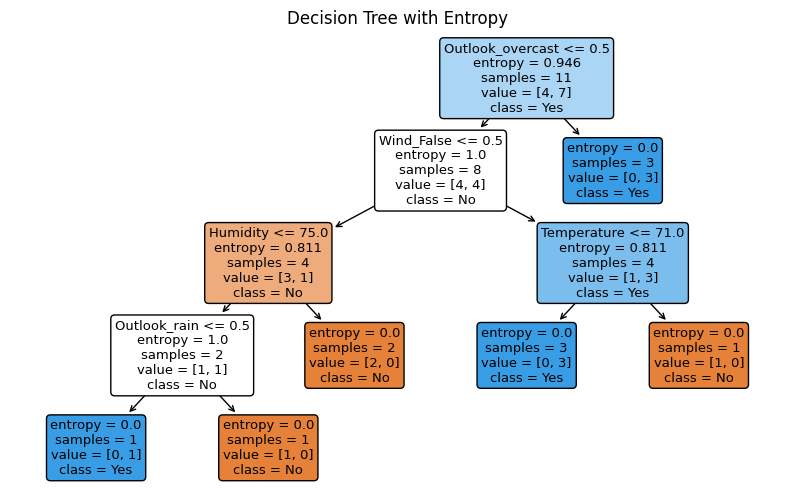

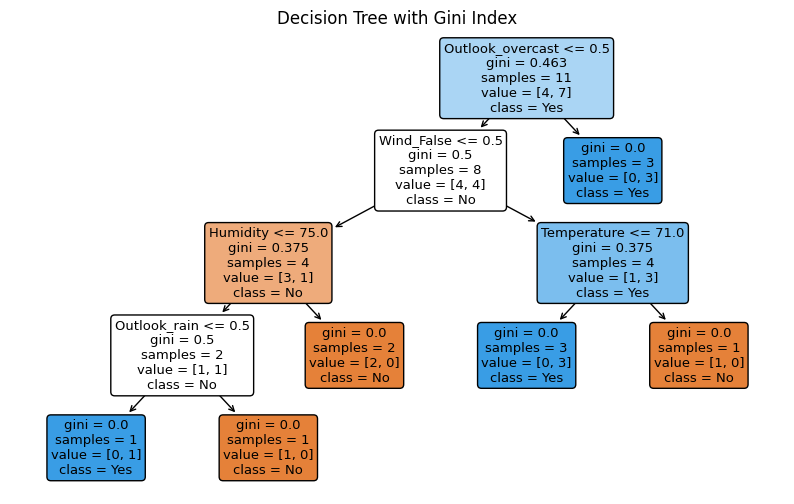

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize Decision Tree with Entropy
plt.figure(figsize=(10, 6))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree with Entropy')
plt.show()

# Visualize Decision Tree with Gini Index
plt.figure(figsize=(10, 6))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree with Gini Index')
plt.show()


In [ ]:
# Display the rules induced by the tree
tree_rules_entropy = export_text(dt_entropy, feature_names=list(X.columns))
tree_rules_gini = export_text(dt_gini, feature_names=list(X.columns))

print("Decision Tree Rules (Entropy):\n", tree_rules_entropy)
print("Decision Tree Rules (Gini):\n", tree_rules_gini)

Decision Tree Rules (Entropy):
 |--- Outlook_overcast <= 0.50
|   |--- Wind_False <= 0.50
|   |   |--- Humidity <= 75.00
|   |   |   |--- Outlook_rain <= 0.50
|   |   |   |   |--- class: yes
|   |   |   |--- Outlook_rain >  0.50
|   |   |   |   |--- class: no
|   |   |--- Humidity >  75.00
|   |   |   |--- class: no
|   |--- Wind_False >  0.50
|   |   |--- Temperature <= 71.00
|   |   |   |--- class: yes
|   |   |--- Temperature >  71.00
|   |   |   |--- class: no
|--- Outlook_overcast >  0.50
|   |--- class: yes

Decision Tree Rules (Gini):
 |--- Outlook_overcast <= 0.50
|   |--- Wind_False <= 0.50
|   |   |--- Humidity <= 75.00
|   |   |   |--- Outlook_rain <= 0.50
|   |   |   |   |--- class: yes
|   |   |   |--- Outlook_rain >  0.50
|   |   |   |   |--- class: no
|   |   |--- Humidity >  75.00
|   |   |   |--- class: no
|   |--- Wind_False >  0.50
|   |   |--- Temperature <= 71.00
|   |   |   |--- class: yes
|   |   |--- Temperature >  71.00
|   |   |   |--- class: no
|--- Outlook_o

Rule induction via decision Tree:

**Decision Tree Rules (Entropy and Gini):**



1.   If Outlook_overcast <= 0.50:
     If Wind_False <= 0.50 and Humidity <= 75.00 and Outlook_rain <= 0.50: Predict 'yes'

2.   If Wind_False <= 0.50 and Humidity <= 75.00 and Outlook_rain > 0.50: Predict 'no'



3.   If Wind_False <= 0.50 and Humidity > 75.00: Predict 'no'

4.   If Wind_False > 0.50 and Temperature <= 71.00: Predict 'yes'



5.   If Wind_False > 0.50 and Temperature > 71.00: Predict 'no'

6.  If Outlook_overcast > 0.50: Predict 'yes'







#Comparing manually extraced rules with the decision tree rules:

The manually extracted rules offer a more detailed and human-understandable interpretation of the patterns. For instance, the manually extracted rules describe specific conditions related to sunny weather and wind, pointing out the negative impact of wind when the weather is sunny. it delves into the interaction of different features, such as the combination of 'rain' and specific temperature ranges leading to a positive outcome for playing golf. This level of detail helps in understanding the complex relationships between features, which might not be as apparent from the Decision Tree rules alone.



In nutshell, both sets of rules highlight the relevance of 'overcast' conditions. Combining the automated decision tree approach with human interpretation can offer a better understanding of the underlying patterns in the dataset.